https://stackoverflow.com/questions/77587951/how-to-fit-a-system-of-odes-with-interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

In [2]:
def system(t, x, k0, k1, k2, p0, p1, p2):
    return np.array([
        p0 * x[2] - k0 * x[0],
        p1 * x[0] - k1 * x[1],
        p2 * x[1] - k2 * x[2]
    ])

In [3]:
def solver(parameters, t=np.linspace(0, 1, 10)):
    x0 = parameters[-3:]
    parameters = parameters[:-3]
    solution = integrate.solve_ivp(system, [t.min(), t.max()], x0, args=parameters, t_eval=t)
    return solution.y

In [4]:
texp = np.linspace(0, 35, 15)
#p0 = np.array([ 0.03693555,  0.38054633, -0.06252069,  1.41453107, -0.11159681])
p0 = np.array([ 0.1, 0.3, 1., 0.01, 1.2, 0.9, 0.5, 1., 0.8])

In [5]:
xexp = solver(p0, t=texp)
xexp += 0.025 * np.random.normal(size=xexp.shape)

In [6]:
def residuals_factory(t, x):
    def wrapped(parameters):
        return 0.5 * np.sum(np.power(x - solver(parameters, t=t), 2))
    return wrapped

In [7]:
texp = np.array([0, 5, 9, 18, 28, 38])
xexp = np.array([
    [0.24, 0.71, 0.95, 0.26, 0.05, 0.22],
    [0.2, 0.62, 0.95, 0.51, 0.13, 0.05], 
    [0.89, 0.66, 0.95, 0.49, 0.28, 0.05]
])

In [8]:
residuals = residuals_factory(texp, xexp)
solution = optimize.minimize(
    residuals, x0=[1, 1, 1, 1, 1, 1, 1, 1, 1],
    bounds=[(0, np.inf)]*9
)

In [9]:
solution

      fun: 0.19555816423659902
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.53959134e-06,  2.76528800e-05, -1.27006738e-04,  1.16656684e-05,
       -1.88987714e-05,  9.59453239e-01,  8.44602166e-06, -1.02973186e-05,
        1.71140880e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1360
      nit: 87
     njev: 136
   status: 0
  success: True
        x: array([0.4296699 , 0.45798361, 0.05734775, 0.43298256, 0.48438383,
       0.        , 0.22499598, 0.19353352, 1.04244737])

In [10]:
p0

array([0.1 , 0.3 , 1.  , 0.01, 1.2 , 0.9 , 0.5 , 1.  , 0.8 ])

In [11]:
tlin = np.linspace(texp.min(), texp.max(), 200)
xhat = solver(solution.x, t=tlin)

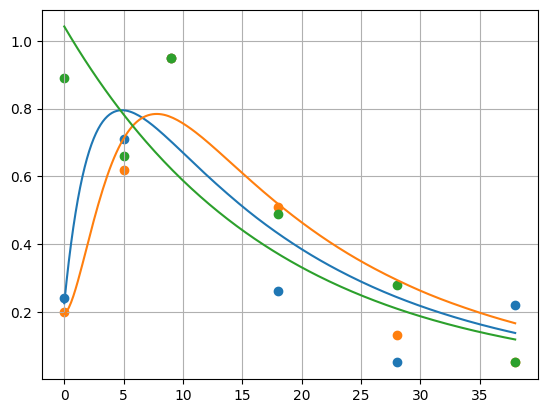

In [12]:
fig, axe = plt.subplots()
for i in range(xexp.shape[0]):
    axe.scatter(texp, xexp[i, :])
    axe.plot(tlin, xhat[i, :])
axe.grid()